In [0]:
!pip install tensorflow==2.0.0 --ignore-installed

     |████████████████████████████████| 86.3MB 61kB/s 
     |████████████████████████████████| 20.2MB 239kB/s 
     |████████████████████████████████| 1.3MB 50.7MB/s 
     |████████████████████████████████| 450kB 63.6MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 112kB 54.0MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 3.8MB 39.4MB/s 
     |████████████████████████████████| 2.7MB 42.5MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 583kB 62.4MB/s 
     |████████████████████████████████| 307kB 53.7MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 2.9MB 46.4MB/s 
     |████████████████████████████████| 163kB 59.9MB/s 
    

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
from google.colab import drive
drive.mount('/content/drive/')
import sqlite3
import pandas as pd
conn = sqlite3.connect("/content/drive/My Drive/Colab Notebooks/Fake_News_DB.db")
data = pd.read_sql("SELECT * from fake_news", conn)
data.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


,id,url,title,content,author,date,tags,type_of_article
0,0,https://panorama.pub/28367-rossiyanam-zapretya...,Россиянам запретят выкладывать в интернет непр...,В Госдуму внесён законопроект о «Защите положи...,Виталий Манн,2019-12-19,Политика,fake
1,1,https://panorama.pub/28365-amerikanskij-genera...,Американский генерал заявил о готовности стрел...,Командующий войсками Округа Колумбия генерал-л...,Бронислав Рубенштейн,2019-12-19,Политика,fake
2,2,https://panorama.pub/28356-donald-tramp-pohval...,Дональд Трамп похвалил Сталина,"Президент США Дональд Трамп, отвечая на вопрос...",Виталий Манн,2019-12-19,Политика,fake
3,3,https://panorama.pub/27498-formalnym-osnovanie...,Формальным основанием для импичмента Трампа ст...,Палата представителей США определилась с форму...,Бронислав Рубенштейн,2019-12-18,Политика,fake
4,4,https://panorama.pub/28237-iran-oshibochno-pod...,Иранские моряки по ошибке подавили протесты в ...,"Признавая, что они были полностью сбиты массой...",Диана Арутюнян,2019-12-18,Политика,fake


In [0]:
y = {'real': 0, 'fake': 1}
data['y'] = data['type_of_article'].map(lambda x: y[x])

data_X = data['content']
data_y = data['y']

In [0]:
data_X

0       госдуму внесён законопроект защите положительн...
1       командующий войсками округа колумбия генерал -...
2       президент сша дональд трамп отвечая вопросы ст...
3       палата представителей сша определилась формули...
4       признавая полностью сбиты массой людей недовол...
                              ...                        
4917    ханты - мансийск 18 дек - риа новости ученые в...
4918    москва 18 дек риа новости ученые крымского фед...
4919    москва 18 дек риа новости ученые московского г...
4920    москва 18 дек риа новости ученые самарского ун...
4921    москва 18 дек риа новости татьяна пичугина арх...
Name: content, Length: 4922, dtype: object

In [0]:
data['type_of_article'].value_counts()

fake    2870
real    2052
Name: type_of_article, dtype: int64

In [0]:
data_X = data_X[1300:]

In [0]:
data_X

1300    серия приключенческих фильмов пираты карибског...
1301    неожиданную пользу лесных пожаров бушующих рег...
1302    финал международного фестиваля армянской культ...
1303    роспотребнадзор обновил требования заведениям ...
1304    компания яндекс опубликовала первые статистиче...
                              ...                        
4917    ханты - мансийск 18 дек - риа новости ученые в...
4918    москва 18 дек риа новости ученые крымского фед...
4919    москва 18 дек риа новости ученые московского г...
4920    москва 18 дек риа новости ученые самарского ун...
4921    москва 18 дек риа новости татьяна пичугина арх...
Name: content, Length: 3622, dtype: object

In [0]:
data_y = data_y[1300:]

In [0]:
!pip install pymorphy2==0.8

In [0]:
from spacy.lang.ru import Russian
nlp = Russian()

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

sw = set(stopwords.words("russian"))
nltk.download('punkt')

def clean_text(text, sw):
    text = nlp(text)
    tokens = [token.text for token in text]
    new_list = []
    nodes = [',', '*', '"', '.', '\'', '“', '”', '’', '‘', '，', '»', '—', '«']
    for token in tokens:
        if token.lower() not in sw and token.lower() not in nodes:
            new_list.append(token.lower())
    return new_list

for i in range(1300, 4921):
    data_X[i] = clean_text(data_X[i], sw)

for i in range(1300, 4921):
    data_X[i] = ' '.join(data_X[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
data_X[1300]

'серия приключенческих фильмов пираты карибского моря покорившая сердца миллионов зрителей всему миру получит долгожданное неожиданное развитие согласно заявлению официального представителя компания disney совместно продюсером джерри брукхаймером планирует съемки продолжения всемирно известной кинофраншизы пираты карибского моря рамках продолжения снято 4 фильма премьера первой части состоится 2020 году картина носить название пираты керченского пролива : петухи откладывают яйца аллегорически посвящена событиям керченском проливе смену центральному персонажу предыдущих картин – капитану джеку воробью придет роскошная плеяда настоящих морских волков живописных местечек житомиром рассказал брукхаймер также интервью продюсером стало известно сюжет развиваться вокруг приключений команды каперского судна ciрвiлiт пiдарешт парусном корабле мусорных контейнеров обшитом армейскими шконками разыскивающей внутреннем азове колесо генотьбы древний могущественный артефакт целью использовать силу пр

In [0]:
data_X.head(5)

1300    серия приключенческих фильмов пираты карибског...
1301    неожиданную пользу лесных пожаров бушующих рег...
1302    финал международного фестиваля армянской культ...
1303    роспотребнадзор обновил требования заведениям ...
1304    компания яндекс опубликовала первые статистиче...
Name: content, dtype: object

In [0]:
data_X.shape

(3622,)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tf_idf = TfidfVectorizer()
list_all_sent = []
for sample in range(1300, 4922):
  list_all_sent.append(data_X[sample])

tf_data = tf_idf.fit_transform(list_all_sent)
print(tf_data.shape)

(3622, 54637)


In [0]:
from keras.utils import to_categorical
data_y = to_categorical(data_y)

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(tf_data,  data_y, train_size = 0.7, shuffle=True)

In [0]:
x_val = X_train[:300]
partial_x_train = X_train[300:]
y_val = y_train[:300]
partial_y_train = y_train[300:]

In [0]:
partial_y_train.shape

(2235, 2)

In [0]:
partial_x_train.shape

(2235, 54637)

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(tf_data.shape[1],)))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=300,
                    validation_data=(x_val, y_val)
                    )

Train on 2235 samples, validate on 300 samples
Epoch 1/12
2235/2235 [==============================] - 1s 660us/sample - loss: 0.7099 - accuracy: 0.5714 - val_loss: 0.6745 - val_accuracy: 0.5600
Epoch 2/12
2235/2235 [==============================] - 1s 608us/sample - loss: 0.6648 - accuracy: 0.5714 - val_loss: 0.6630 - val_accuracy: 0.9867
Epoch 3/12
2235/2235 [==============================] - 1s 601us/sample - loss: 0.6466 - accuracy: 0.6304 - val_loss: 0.6372 - val_accuracy: 0.5600
Epoch 4/12
2235/2235 [==============================] - 1s 595us/sample - loss: 0.6157 - accuracy: 0.6318 - val_loss: 0.6009 - val_accuracy: 0.9867
Epoch 5/12
2235/2235 [==============================] - 1s 599us/sample - loss: 0.5728 - accuracy: 0.7996 - val_loss: 0.5481 - val_accuracy: 0.7733
Epoch 6/12
2235/2235 [==============================] - 1s 596us/sample - loss: 0.5039 - accuracy: 0.9875 - val_loss: 0.4869 - val_accuracy: 0.9667
Epoch 7/12
2235/2235 [==============================] - 1s 603us/

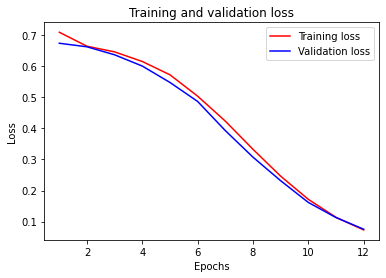

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history.epoch) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
predictions = model.predict(X_test)

In [0]:
predictions[0]

array([0.97994435, 0.02005563], dtype=float32)

In [0]:
y_test[0]

array([1., 0.], dtype=float32)

In [0]:
predictions[1]

array([0.07613866, 0.9238613 ], dtype=float32)

In [0]:
y_test[1]

array([0., 1.], dtype=float32)

In [0]:
new_articles = ['''Обновлённая редакция правил русского языка, заверенная в РАН, поступила во все министерства, ведомства и прочие государственные организации. Особое внимание лингвисты попросили уделить Минтруда на изменения названия некоторых профессий. В частности, регистраторы браков в ЗАГСах официально поменяют профессию и будут по новым языковым нормам именоваться бракоделами. Соответствующие изменения рекомендованы к внесению во все нормативно-правовые акты и документы, а также в трудовые книжки. «Основные языковые изменения направлены на сохранение идентичности языка и замены иностранных слов исконно русскими. Зачем мы используем иностранное слово «регистратор», если есть прекрасное слово «бракодел». Делать брак – хорошее дело, помогать людям объединяться в ячейки общество – это прекрасно. Думаю, сотрудники ЗАГСов с пониманием отнесутся к переименованию их профессии», — сказала доктор лингвистических наук Сузанна Оганесян. В РАН добавили, что изменения коснутся слова «география», так как оно тоже имеет иностранное – греческое происхождение, её заменят русским аналогом «землеописание». Поскольку ранее существительное редко применялось в речи и официальных документах учёным потребуется время для определения прилагательных, которые будут приятны удобны для произношения и написания.''', ''' Диетолог Елена Соломатина рассказала "Вечерней Москве", в каких продуктах чаще всего встречается сальмонелла и какие меры предосторожности помогут снизить риск заболевания. По словам врача, сальмонелла очень часто встречается в мясе и рыбе, особенно если они долгое время пролежали в холодильнике. Поэтому Соломатина призвала при покупке обращать внимание на внешний вид и запах мяса и продуктов из него. "Если мясо прижимаешь пальцем, и оно буквально проваливается, не возвращаясь в прежний вид, еще один признак испорченного продукта", — пояснила врач. Кроме того, велик риск заразиться сальмонеллезом от молочной продукции. "Особенно опасно фермерское молоко, которое еще не прошло процедуру пастеризации", — уточнила Соломатина. Поэтому обязательно нужно покупать промаркированную "молочку" с актуальными сроками годности. Диетолог также призвала быть внимательным при покупке рыбы. По ее словам, сейчас в ней очень много бактерий. "Особенно это касается речных сортов рыбы. Они фактически все непригодны для употребления. Даже заядлые рыбаки об этом говорят", — подчеркнула Соломатина. Она также посоветовала тщательно промывать продукты проточной водой перед употреблением, подчеркнув, что даже фрукты и овощи могут быть источником сальмонеллы. Соломатина обратила внимание, что бактерией заражена каждая четвертая курица, поэтому необходимо быть очень внимательными при выборе яиц и мяса птицы. Она подчеркнула, что наличие опасной палочки никак не сказывается на вкусе продуктов, поэтому ее трудно определить при употреблении готовой пищи. "Единственный способ не отравиться – это соблюдать нормы хранения продуктов и не покупать просроченную пищу", — заключила Соломатина.''', '''Полотно французского художника Анри Матисса «Танец» уберут со всеобщего обозрения из Эрмитажа в Санкт-Петербурге из-за пропаганды сомнительных половых отношений. К выводу о необходимости изъятия картины из музея пришла экспертная комиссия по нравственности во главе с Виталием Милоновым. «Я на днях посетил Эрмитаж и увидел там огромное количество безнравственности. Особенно впечатлила меня картина, называющаяся «Танец», какие-то то ли бабы, то ли мужики, то ли трансгендеры танцуют голыми, предваряя грядущую оргию. И мы выставили это на всеобщее обозрение. Это видят дети, более того, мы говорим детям, что им нужно обязательно ходить в Эрмитаж или Третьяковку. Комиссия согласилась с моими доводами, и решение убрать это полотно с обозрения принято», — заявил Милонов. Дальнейшая судьба «Танца» остаётся неизвестной. Картина может остаться в фондах Эрмитажа или продана в одну из картинных галерей Европы. Виталий Милонов пообещал провести нравственную экспертизу и в других государственных музеях.''', ''' Двойную задачу перед главами муниципалитетов поставил губернатор Тверской облаcти Игорь Руденя. "Мы сейчас концентрируемся на борьбе с коронавирусной инфекцией, защите людей и поддержке экономики, и вторая часть – это борьба с пожарами, палами травы и их профилактика. Главы муниципалитетов со своими коллегами должны начать активную работу по этому направлению, в том числе обход дачных участков", - сказал глава региона на заседании рабочей группы по предупреждению завоза и распространения новой коронавирусной инфекции COVID-2019 в Тверской областид. Заедание прошло в виде видеоконференции. Руденя поручил главам муниципальных образований взять на личный контроль работу всех служб жизнеобеспечения на местах. По сообщению пресс-службы областного правительства, на данный момент в регионе подтверждены четыре случая заболевания новой коронавирусной инфекцией. Два человека уже выздоровели, 27 марта они выписаны из больницы. Ещё два пациента проходят лечение.''', '''Украденную из мемориального музея Бапу-Бхаван урну с прахом индийского национального лидера Махатмы Ганди нашли в подпольной лаборатории, занимавшейся нелегальным клонированием человека в городе Пуна. Полиции удалось обнаружить похищенную реликвию при помощи вмонтированного в урну GPS-передатчика. Помимо останков Ганди, в лаборатории обнаружены образцы человеческих тканей в сосудах с подписями «Владимир Ленин», «Адольф Гитлер», «Уинстон Черчилль», «Лев Троцкий» и «Бенедикт XVI». Следствию предстоит установить, действительно ли они содержат образцы ДНК исторических лидеров и с какой целью владельцы лаборатории держали их у себя. Поскольку клонирование человека в Индии находится под запретом, похитителям может грозить до 20 лет тюрьмы, а организаторам лаборатории – до 3 лет. «Мы очень удивились тому, что нашли в этом месте. Всё это надо изучать. Помнится, Сталин как-то сказал, что после смерти Ганди не с кем поговорить (источник перепутал Сталина с президентом В. Путиным – прим. ред.). Возможно, это и было целью преступников – клонировать Ганди, чтобы спросить у него о чём-то. Так или иначе, они осквернили прах отца народов Индии и должны понести за это суровое наказание», — сказал один из членов следственной группы.''', '''Президент России Владимир Путин провел совещание по ситуации вокруг коронавируса со своими полпредами в регионах. Он попросил их обеспечить выполнение поручений на местах и лично проконтролировать это. Ответом на провокации и злонамеренные домыслы должна стать уверенная работа и информирование людей, подчеркнул российский лидер. Путин напомнил, что на данный момент удалось предотвратить большой прирост заразившихся, а также призвал опираться на опыт других стран. "Наши действия должны быть обоснованными и профессиональными. Именно такой подход позволил нам сегодня выиграть время, сдержать взрывное распространение коронавирусной инфекции в предыдущие недели. И этот запас по времени нам надо полностью и результативно использовать", — сказал он. После этого президент перешел к конкретным мерам. Так, он призвал: —оценить возможности коечного фонда; —использовать схемы межрегионального взаимодействия и принимать больных из других субъектов; —в ближайшие дни завершить инвентаризацию медучреждений и создать единую базу данных; —развернуть дополнительные центры диагностики коронавируса в регионах; —обеспечить оперативную регистрацию тест-систем, как отечественных, так и зарубежных; —провести полную инвентаризацию аппаратов ИВЛ и проверить их готовность к работе; —обеспечить дополнительное обучение врачей для работы с ИВЛ; —создать дополнительный резерв лекарств, направленных против коронавируса; —своевременно выплачивать зарплату медикам. Путин поручил кабмину предусмотреть компенсации регионам при размещении на своей территории больных из других субъектов. "Даже если сейчас меры по коронавирусу кажутся избыточными, береженого Бог бережет", — подчеркнул он. Президент также призвал пожилых россиян оставаться дома, а остальных — проявлять заботу о близких. Он отдельно подчеркнул, что введенные в столице и Подмосковье меры оправданны, и призвал жителей этих регионов отнестись к этому со всей ответственностью. "Главное сейчас — максимально локализовать источники распространения коронавируса", — напомнил глава государства. В этой связи он поручил активнее выявлять тех граждан, которые в последние две недели вернулись из-за рубежа. Отдельно Путин затронул тему обеспечения населения всем необходимым. Аптеки, органы ЖКХ и продуктовые магазины продолжат работу на этой неделе, но на особых условиях, рассказал он. В первую очередь нужно обеспечить порядок обслуживания, который не допускает очередей. При этом на непрерывных производствах важно предусмотреть гибкий график работы с переводом сотрудников на удаленный режим, подчеркнул президент. Почему и кого будут наказывать за "репост паники" По товарам первой необходимости уже создан необходимый запас, заверил Путин, и поручил полпредам и губернаторам постоянно отслеживать ситуацию в торговле, не допускать локальных сбоев и завышения цен. "Надо исключить любые попытки ограничить товарные потоки между регионами, жестко пресекать любые спекуляции, монопольное взвинчивание цен", — подчеркнул он. Кабмину и Минфину поручено сформировать комплекс системных шагов и предусмотреть необходимое финансирование для устойчивости региональных бюджетов. "Кабмин пополнит региональные фонды, чтобы у субъектов Федерации появились дополнительные возможности для поддержки кредитования бизнеса", — пообещал Путин. Отсрочки по налогам и другие меры поддержки малого и среднего бизнеса скажутся на бюджетах регионов, у них могут возникать выпадающие доходы. При этом нельзя урезать текущие расходы, так как задача — без сбоев и в полном объеме финансировать запланированные программы и контракты, отметил глава государства. Пандемии COVID-19, первые случаи которого были зафиксированы в китайском городе Ухань в конце прошлого года, подвержены 177 стран. По данным ВОЗ, заразились как минимум 634 тысячи человек, свыше 30 тысяч умерли. Согласно статистике Университета Джонса Хопкинса, заболели уже более 732 тысяч человек, 34 686 скончались, 154 тысячи пациентов выздоровели. Первая по числу смертей от коронавируса — Италия (там количество погибших приближается к 11 тысячам), за ней следуют Испания, КНР, Иран, Франция и Великобритания. Наибольшее число зараженных зафиксировано в США — свыше 124 тысяч. В России зарегистрировано 1836 больных коронавирусом (1226 из них — в Москве), девять человек умерли, 66 вылечились. Последние данные о ситуации с COVID-19 в России и мире представлены на портале стопкоронавирус.рф.''']

In [0]:
for i, article in enumerate(new_articles):
    new_articles[i] = clean_text(new_articles[i], sw)

for i, article in enumerate(new_articles):
    new_articles[i] = ' '.join(new_articles[i])

In [0]:
tf_new = tf_idf.transform(new_articles)
print(tf_new.shape)

(6, 54637)


In [0]:
new_predictions = model.predict(tf_new)

In [0]:
new_predictions[0]

array([0.09995524, 0.90004474], dtype=float32)

In [0]:
new_predictions[1]

array([0.11868879, 0.8813112 ], dtype=float32)

In [0]:
new_predictions[2]

array([0.08112919, 0.9188708 ], dtype=float32)

In [0]:
new_predictions[3]

array([0.14478031, 0.8552197 ], dtype=float32)

In [0]:
new_predictions[4]

array([0.1271146 , 0.87288547], dtype=float32)

In [0]:
new_predictions[5]

array([0.10313572, 0.89686424], dtype=float32)